In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [63]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [65]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


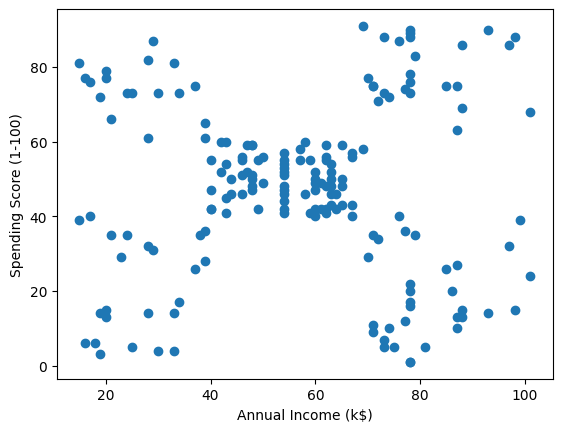

In [66]:
# Explore the Data
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [67]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})


In [68]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_train)
preds = kmeans.predict(X_test)
score = silhouette_score(X_test, preds)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.59


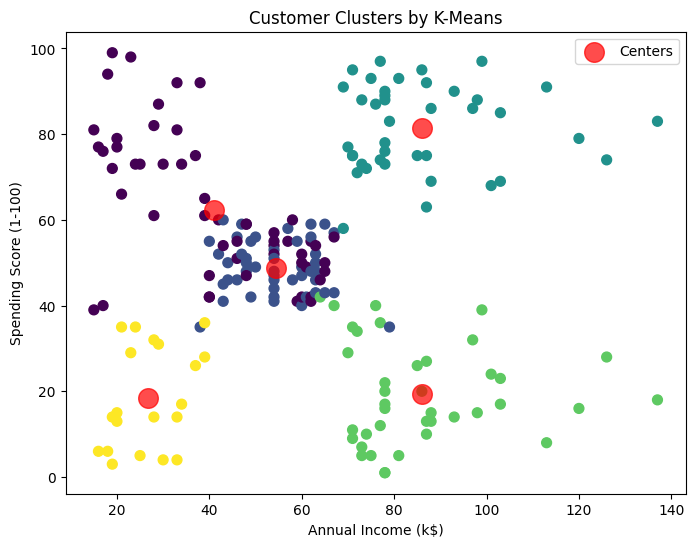

In [86]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.7, label='Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters by K-Means')
plt.legend()
plt.show()

In [88]:
df.groupby('Cluster').mean()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,55.648148,0.592593,25.185185,41.092593,62.240741
1,83.872340,0.574468,55.638298,54.382979,48.851064
2,161.025000,0.550000,32.875000,86.100000,81.525000
3,159.743590,0.487179,39.871795,86.102564,19.358974
4,24.100000,0.600000,46.250000,26.750000,18.350000


In [89]:
df.to_csv("Mall_Customers_Updated.csv", index=False)
print("File saved successfully ✅")

File saved successfully ✅
